In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h4>In Age and cabin there are so many null values</h4>

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ol>
    <li>Total passenger = 891</li>
    <li>38 % passenger survived</li>
    <li>About 75 % passenger belongs to 3rd class</li>
    <li>Mostly young passenger near 28 age</li>
    <li>Most passengers traveled alone or with one relative.</li>
</ol>

<Axes: >

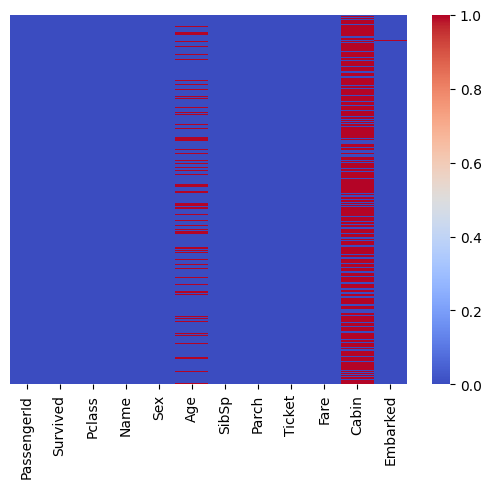

In [6]:
sns.heatmap(titanic_df.isnull(), yticklabels= False, cbar= True,cmap='coolwarm')

<h2> Male/ Female Survival </h2>

<Axes: xlabel='Sex', ylabel='count'>

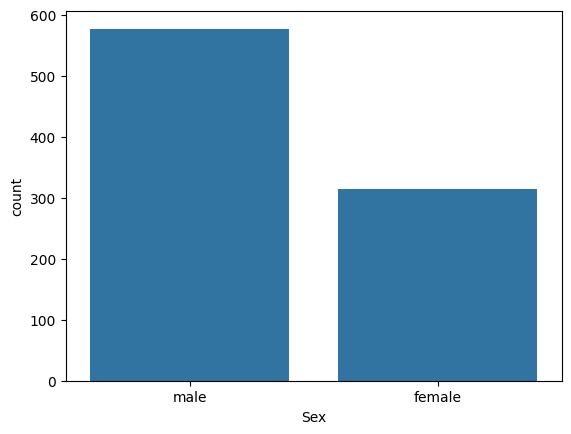

In [7]:
sns.countplot(x='Sex', data=titanic_df )

In [8]:
titanic_df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [9]:
print(577/891)

0.6475869809203143


<h3>So in Ship 65 % are male, male are double of female</h3>

Text(0.5, 1.0, 'Survival Vs Sex')

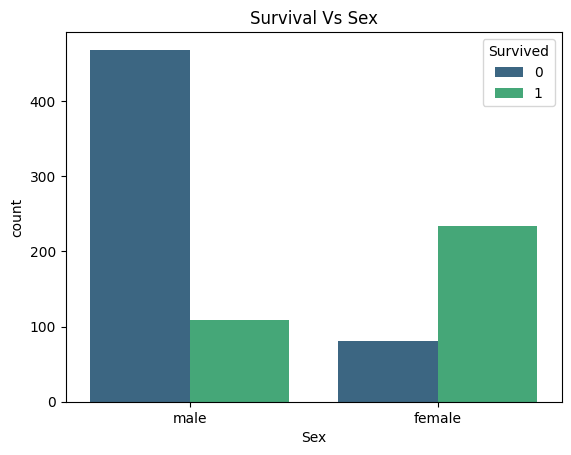

In [10]:
sns.countplot(x='Sex', data=titanic_df , hue = 'Survived', palette='viridis')
plt.title('Survival Vs Sex')

In [11]:
titanic_df.groupby(['Sex', 'Survived']).size()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [12]:
print ( f"Female % survival = {(233/314) * 100 }, male % survival = {(109/577) * 100 }")

Female % survival = 74.20382165605095, male % survival = 18.890814558058924


<h3> Survival % is high in Female about 4 times of male</h3>

<h1>Survival Vs Class</h1>

In [13]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [14]:
print( 491/891)
print( 216/891)
print(184/891)

0.5510662177328844
0.24242424242424243
0.20650953984287318


<ol>
    <li>3rd Class - 55 %</li>
    <li>2nd Class - 20 %</li>
    <li>1st Class - 25 %</li>
</ol>
<h3> more than half of the passenger are 3rd Class </h3>

Text(0.5, 1.0, 'Survival Vs Class')

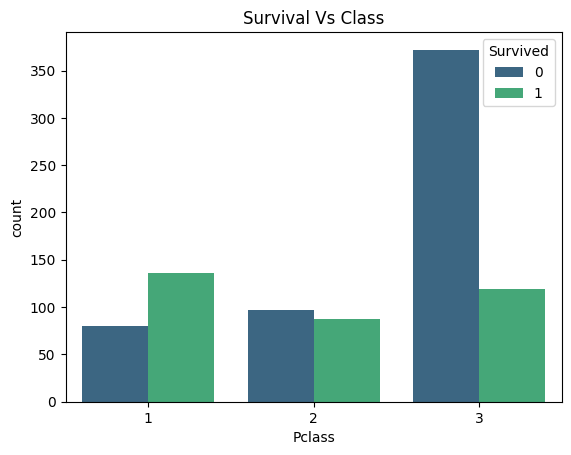

In [15]:
sns.countplot(x='Pclass', data=titanic_df , hue = 'Survived', palette='viridis')
plt.title('Survival Vs Class')

In [16]:
titanic_df.groupby(['Pclass', 'Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [17]:
print(f"3rd class survival % - { (119/491)*100} 2nd class survival % - { (87/184)*100}  1st class survival % - { (136/216)*100}")

3rd class survival % - 24.236252545824847 2nd class survival % - 47.28260869565217  1st class survival % - 62.96296296296296


In [18]:
print(f"total died = {80+97+372}")
print(372/549)
print(80/549)

total died = 549
0.6775956284153005
0.14571948998178508


<ol>
    <li>Survival % is minimum in 3rd class - 25 % , high in - 1st class - 62 %</li>
    <li>In 2nd Class half of the people were died</li>
    <li>Passenger who died , mostly belongs to 3rd class - 67 %</li>
    <li> In First Class only 15 % were died</li>
</ol>

In [19]:
pd.crosstab([titanic_df['Sex'], titanic_df['Pclass']], titanic_df['Survived'], margins=True, margins_name='Total')


Survived         0    1  Total
Sex    Pclass                 
female 1         3   91     94
       2         6   70     76
       3        72   72    144
male   1        77   45    122
       2        91   17    108
       3       300   47    347
Total          549  342    891

In [20]:
print(f" 1 st class female surival {(91/94) *100} 2nd class female survival { (70/76)* 100}")
print(f" 1 st class male survival { (45/122) *100} 2nd class male survival { (17/108) * 100} 3rd class male survival {( 47/347)*100}")

 1 st class female surival 96.80851063829788 2nd class female survival 92.10526315789474
 1 st class male survival 36.885245901639344 2nd class male survival 15.74074074074074 3rd class male survival 13.544668587896252


In [21]:
print(f"1 st class female{94/216} 2nd class female {76/284} 3rd class female {144/491}")

1 st class female0.4351851851851852 2nd class female 0.2676056338028169 3rd class female 0.29327902240325865


<h3>Female 1st & 2nd class had very high survival rates (97%, 92%)

Male 3rd class had the lowest survival rate (13.5%)</h3>
<h3>Female % is high in !st class 43.5 % </h3>

<h1>Age Vs Survival </h1>

<Axes: >

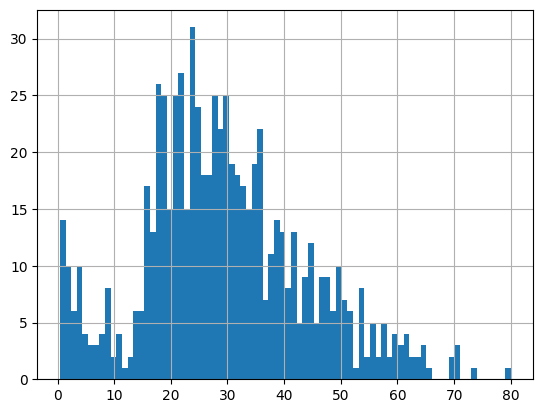

In [22]:
titanic_df['Age'].hist(bins=80)

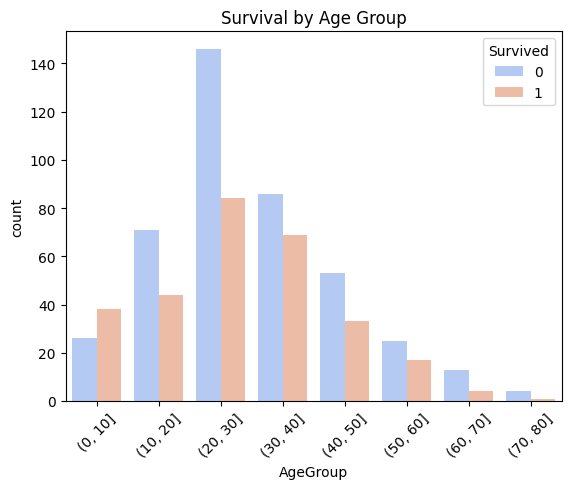

In [23]:
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0,10, 20, 30, 40, 50,60,70, 80])

sns.countplot(x='AgeGroup', hue='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival by Age Group')
plt.xticks(rotation=45)
plt.show()


<h3>persons who died are young</h3>

<h1>Correlation Matrix (Sex vs Class vs Survival)<h1>

In [24]:
#Convert Sex to numeric ( male = 0, female = 1)
titanic_df['Sex_num'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [25]:
corr_matrix = titanic_df[['Sex_num', 'Pclass', 'Survived']].corr()
print(corr_matrix)


           Sex_num    Pclass  Survived
Sex_num   1.000000 -0.131900  0.543351
Pclass   -0.131900  1.000000 -0.338481
Survived  0.543351 -0.338481  1.000000


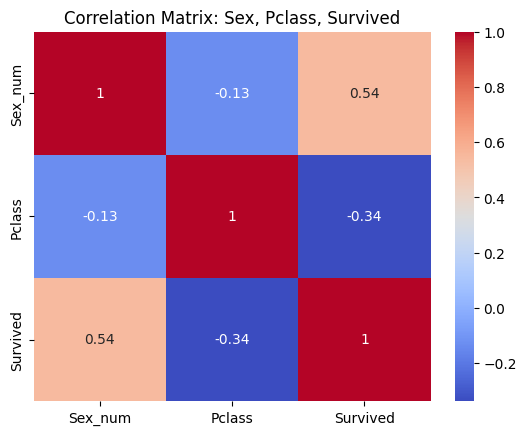

In [26]:

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Sex, Pclass, Survived")
plt.show()

<ol>
    <li>Female more survive 54 %</li>
    <li> passenger who belongs to higher class more survive </li>
</ol>

In [27]:
# Check missing before
titanic_df = titanic_df.dropna(subset=['Age'])
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  714 non-null    int64   
 1   Survived     714 non-null    int64   
 2   Pclass       714 non-null    int64   
 3   Name         714 non-null    object  
 4   Sex          714 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        714 non-null    int64   
 7   Parch        714 non-null    int64   
 8   Ticket       714 non-null    object  
 9   Fare         714 non-null    float64 
 10  Cabin        185 non-null    object  
 11  Embarked     712 non-null    object  
 12  AgeGroup     714 non-null    category
 13  Sex_num      714 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 79.2+ KB


In [28]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.365546
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


In [29]:
corr_matrix1 = titanic_df[['Sex_num', 'Pclass', 'Survived', 'Age', 'Fare'] ]
corr_matrix1 = corr_matrix1.corr()
print(corr_matrix1)



           Sex_num    Pclass  Survived       Age      Fare
Sex_num   1.000000 -0.155460  0.538826 -0.093254  0.184994
Pclass   -0.155460  1.000000 -0.359653 -0.369226 -0.554182
Survived  0.538826 -0.359653  1.000000 -0.077221  0.268189
Age      -0.093254 -0.369226 -0.077221  1.000000  0.096067
Fare      0.184994 -0.554182  0.268189  0.096067  1.000000


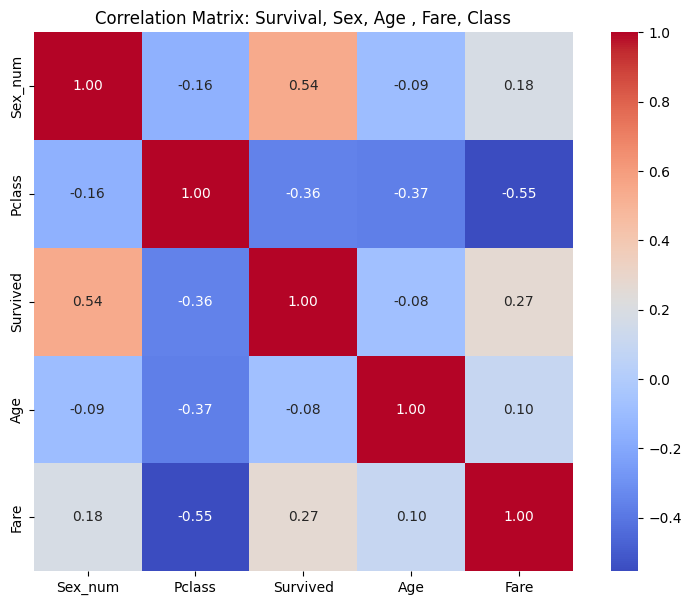

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix: Survival, Sex, Age , Fare, Class")
plt.show()

 Feature Pair             Correlation                 Interpretation                                      

Sex (numeric) & Survived  +0.54        Strong positive – females more likely to survive     
 Pclass & Survived        -0.36        Moderate negative – higher class had better survival 
Fare & Survived           +0.27        Slight positive – higher fare = higher survival      
 Age & Survived           -0.08        Very weak negative – older passengers slightly less likely to survive 
Pclass & Fare             -0.55        Strong negative – lower class paid less fare    
Sex (numeric) & Pclass    -0.16        Weak negative – males more likely in lower classes   
Fare & Age                +0.10        Very weak positive – older passengers paid slightly more 


<h1> Summary</h1>

<ol>
  <li><strong>General Passenger Overview</strong>
    <ul>
      <li><strong>Total passengers:</strong> 891</li>
      <li><strong>Survival rate:</strong> ~38% passengers survived</li>
      <li><strong>Passenger class distribution:</strong> About 75% of passengers belonged to 3rd class</li>
      <li><strong>Age:</strong> Most passengers were young, with a median age around 28</li>
      <li><strong>Travel pattern:</strong> Most passengers traveled alone or with only one relative</li>
    </ul>
  </li>

  <li><strong>Gender-Based Insights</strong>
    <ul>
      <li><strong>Gender distribution:</strong> Males ~65% (almost double the number of females)</li>
      <li><strong>Survival by gender:</strong> Female survival rate is 4 times higher than that of males</li>
    </ul>
  </li>

  <li><strong>Class-Based Survival Analysis</strong>
    <ul>
      <li><strong>Class distribution:</strong> More than half of the passengers were in 3rd class</li>
      <li><strong>Survival rates by class:</strong>
        <ul>
          <li>1st class: ~62% survived</li>
          <li>2nd class: ~50% died</li>
          <li>3rd class: Only ~25% survived</li>
        </ul>
      </li>
      <li><strong>Deaths by class:</strong>
        <ul>
          <li>67% of passengers who died were from 3rd class</li>
          <li>In 1st class, only 15% died</li>
        </ul>
      </li>
    </ul>
  </li>

  <li><strong>Female Survival by Class</strong>
    <ul>
      <li>1st class females: ~97% survived</li>
      <li>2nd class females: ~92% survived</li>
      <li>3rd class males: Only 13.5% survived</li>
    </ul>
  </li>

  <li><strong>Other Notable Insights</strong>
    <ul>
      <li>Female representation highest in 1st class (~43.5%)</li>
      <li>Younger passengers had a higher mortality rate</li>
      <li>Passengers in higher classes had better survival rates</li>
      <li>Lower-class passengers paid less fare</li>
    </ul>
  </li>
</ol>
